<a href="https://colab.research.google.com/github/camyllalima/AnaliseEnem2022/blob/main/AnaliseENEM2022.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Etapa de carregamento de dados e importação de bibliotecas:**

In [ ]:
# Importando as bibliotecas

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.gridspec as gridspec

plt.style.use('seaborn-talk')
from matplotlib.patches import Patch

In [ ]:
# Importando o dataset

from google.colab import drive
drive.mount('/content/drive')

In [ ]:
# Carregando o dataset

dados = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MICRODADOS_ENEM_2022.csv', sep= ";", encoding="iso-8859-1")

# **Etapa de criação de dicionários para conversão de dados:**

In [ ]:
# Tipos de variáveis categóricas

tiposEscola = {
    1: 'Não Informada',
    2: 'Escola Pública',
    3: 'Escola Privada'
}

tiposRenda = {
    'A': 'Nenhuma Renda',
    'B': 'Até 1.212,00',
    'C': '1.212,01 - 1818,00',
    'D': '1818,01 - 2.200,00',
    'E': '2.424,01 - 3.030,00',
    'F': '3.030,01 - 3.636,00',
    'G': '3.636,01 - 4.848,00',
    'H': '4.848,01 - 6.060,00',
    'I': '6.060,01 - 7.272,00',
    'J': '7.272,01 - 8.484,00',
    'K': '8.484,01 -  9.696,00',
    'L': '9.696,01 - 10.908,00',
    'M': '10.908,01 - 12.120,00',
    'N': '12.120,01 - 14.544,00',
    'O': '14.544,01 - 18.180,00',
    'P': '18.180,01 - 24.240,00',
    'Q': 'Acima de 24.240,00',
}

tiposAcessoInternet = {
    'A': 'Sem acesso',
    'B': 'Com acesso'
}

tiposEscolaridadeResponsavel = {
    'A': 'Nunca estudou',
    'B': '5º Ano incompleto',
    'C': '5º ano Completo',
    'D': 'E.F completo',
    'E': 'E.M completo',
    'F': 'E.S completo',
    'G': 'Pós-graduação',
    'H': 'Sem resposta'
}

tiposCorRaca = {
  0:'Não declarado',
  1:'Branca',
  2:'Preta',
  3:'Parda',
  4:'Amarela',
  5:'Indígena'
}

tiposNotas = {
    'NU_NOTA_CN': 'Ciências da Natureza',
    'NU_NOTA_LC': 'Linguagens e Códigos',
    'NU_NOTA_CH': 'Ciências Humanas',
    'NU_NOTA_MT': 'Matemática',
    'NU_NOTA_REDACAO': 'Redação',
    'MEDIA_GERAL': 'Média Geral'
}

tiposOcupacao = {
    'A': 'Grupo 1',
    'B': 'Grupo 2',
    'C': 'Grupo 3',
    'D': 'Grupo 4',
    'E': 'Grupo 5',
    'F': 'Sem resposta',
}

tiposSituacaoRedacao = {
    1: 'Sem Problemas',
    2: 'Anulada',
    3: 'Cópia Texto Motivador',
    4: 'Em Branco',
    6: 'Fuga ao Tema',
    7: 'Tipo Textual Incorreto',
    8: 'Texto Insuficiente',
    9: 'Parte Desconectada'
}

tiposCompetenciasRedacao = {
    'NU_NOTA_COMP1': 'Competência 1',
    'NU_NOTA_COMP2': 'Competência 2',
    'NU_NOTA_COMP3': 'Competência 3',
    'NU_NOTA_COMP4': 'Competência 4',
    'NU_NOTA_COMP5': 'Competência 5',
    'NU_NOTA_REDACAO': 'Média Redação'
}

tiposPresencas = {
    'Eliminado': 'Eliminados',
    'Presente': 'Presentes'
}

# **Etapa de criação de arrays com filtros dos dados:**

In [ ]:
# Selecionando colunas importantes

# Recorte de presença/faltas por região/sexo/raça
colunasPresenca = ['NU_INSCRICAO','TP_SEXO','TP_COR_RACA','TP_ESCOLA','TP_PRESENCA_LC','TP_PRESENCA_MT','SG_UF_PROVA']
dados_colunasPresenca = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MICRODADOS_ENEM_2022.csv', sep= ";", encoding="iso-8859-1", usecols=colunasPresenca)

# Recorte de perfil sócio econômico
colunasPerfilSocioEconomico = ['NU_INSCRICAO','TP_SEXO','TP_COR_RACA','TP_ESCOLA','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_REDACAO', 'Q001','Q002','Q005', 'Q006','Q025']
dados_colunasPerfilSocioEconomico = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MICRODADOS_ENEM_2022.csv', sep= ";", encoding="iso-8859-1", usecols=colunasPerfilSocioEconomico)

# Recorte de tipo de escola/nota final/redação
colunasNotaEscola = ['NU_INSCRICAO','TP_COR_RACA','TP_ESCOLA','SG_UF_PROVA','NU_NOTA_CN','NU_NOTA_LC','NU_NOTA_CH','NU_NOTA_MT','NU_NOTA_REDACAO']
dados_colunasNotaEscola = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MICRODADOS_ENEM_2022.csv', sep= ";", encoding="iso-8859-1", usecols=colunasNotaEscola)

# Recorte de dificuldades na redação/tipo de escola
colunasDificuldadesRedacao = ['NU_INSCRICAO','TP_COR_RACA','TP_ESCOLA','SG_UF_PROVA','TP_STATUS_REDACAO','NU_NOTA_COMP1','NU_NOTA_COMP2','NU_NOTA_COMP3','NU_NOTA_COMP4','NU_NOTA_COMP5','NU_NOTA_REDACAO']
dados_colunasDificuldadesRedacao = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/MICRODADOS_ENEM_2022.csv', sep= ";", encoding="iso-8859-1", usecols=colunasDificuldadesRedacao)

# **Etapa de criação de arrays de cores a serem utilizados nos gráficos:**

In [ ]:
# Cores

colors = ['green', 'red', 'blue']
coresPrincipais = ['#bfccff','#2ba9ff','#1f78b4']
coresSecundarias = ['#34d0dc','#fec240','#9f2f38']
coresTerciarias = ['#abedff','#abe1ff','#ffe840','#fdff5e','#ff4a4a','#ec4654']
cores2 = sns.color_palette("OrRd")
novas_cores = sns.color_palette("OrRd", n_colors=2)[::-1]
degrade = ["#FF0000","#FF3300","#FF6600","#FF9900","#FFCC00","#FFFF00","#CCFF00","#99FF00","#66FF00","#33FF00","#00FF00",
           "#00FF33","#00FF66","#00FF99","#00FFCC","#00FFFF","#00CCFF","#0099FF","#0066FF","#0033FF","#0000FF","#3300FF",
           "#6600FF","#9900FF","#CC00FF","#FF00FF","#FF00CC"]

# **Etapa de criação de panoramas de casos a serem analisados:**

In [ ]:
# Panorama de Presença

# Criação de coluna generalista para "Eliminados" e "Presentes"
dados_colunasPresenca['ELIMINADOS_CONC'] = np.where((dados_colunasPresenca['TP_PRESENCA_LC'] == 0)\
                                         | (dados_colunasPresenca['TP_PRESENCA_LC'] == 2)\
                                         | (dados_colunasPresenca['TP_PRESENCA_MT'] == 0)\
                                         | (dados_colunasPresenca['TP_PRESENCA_MT'] == 2), 'Eliminado', 'Presente')

presencaInscritos = dados_colunasPresenca.groupby('ELIMINADOS_CONC')['NU_INSCRICAO'].count().reset_index()

# Presença por tipo de escola
presencaInscritos = dados_colunasPresenca.groupby('TP_ESCOLA')['NU_INSCRICAO'].count().reset_index()
presencaInscritos['TP_ESCOLA'] = presencaInscritos['TP_ESCOLA'].replace(tiposEscola)

# Presentes e eliminados por tipo de escola
presencaEscola = dados_colunasPresenca.groupby(['TP_ESCOLA','ELIMINADOS_CONC'])['NU_INSCRICAO'].count().reset_index()
presencaEscola['TP_ESCOLA'] = presencaEscola['TP_ESCOLA'].replace(tiposEscola)
presencaEscola['ELIMINADOS_CONC'] = presencaEscola['ELIMINADOS_CONC'].replace(tiposPresencas)

# Criação coluna eliminados, para todos os candidatos, com base em isna() em cada prova
dados_colunasNotaEscola['ELIMINADOS_CONC'] = np.where((dados_colunasNotaEscola['NU_NOTA_CN'].isna())\
                                         | (dados_colunasNotaEscola['NU_NOTA_CH'].isna())\
                                         | (dados_colunasNotaEscola['NU_NOTA_LC'].isna())\
                                         | (dados_colunasNotaEscola['NU_NOTA_MT'].isna())\
                                         | (dados_colunasNotaEscola['NU_NOTA_REDACAO'].isna()), 'Eliminado', 'Presente')

# Criação de coluna media geral dos candidatos presentes nos dois dias de prova
dados_colunasNotaEscola.loc[dados_colunasNotaEscola['ELIMINADOS_CONC'] == 'Presente', 'MEDIA_GERAL']\
   = dados_colunasNotaEscola[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

In [ ]:
# Panorama de Cor/Raça

# Média geral para candidatos com 'Cor/Raça' declarada
mediaRaca = dados_colunasNotaEscola[dados_colunasNotaEscola['ELIMINADOS_CONC'] == 'Presente']\
            .loc[dados_colunasNotaEscola['TP_COR_RACA'].isin([1,2,3,4,5])]\
            .groupby('TP_COR_RACA')['MEDIA_GERAL']\
            .agg(['mean','count']).reset_index()\
            .rename(columns={'TP_COR_RACA':'Cor/Raça','mean':'Nota Média', 'count':'Quantidade'})

# Mapear os valores da coluna 'Cor/Raça' para os novos nomes
mediaRaca['Cor/Raça'] = mediaRaca['Cor/Raça'].replace(tiposCorRaca)

In [ ]:
# Panorama de Tipo de Escola com  Notas Médias

mediaTipoEscola = dados_colunasNotaEscola[dados_colunasNotaEscola['ELIMINADOS_CONC'] == 'Presente']\
                  .loc[dados_colunasNotaEscola['TP_ESCOLA'].isin([2,3])]\
                  .groupby(['TP_ESCOLA'])['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','MEDIA_GERAL']\
                  .agg(['mean']).reset_index()
mediaTipoEscola['TP_ESCOLA'] = mediaTipoEscola['TP_ESCOLA'].replace(tiposEscola)
mediaTipoEscola.rename(columns=tiposNotas, inplace=True)

In [ ]:
# Panorama de Redação por Tipo de Escola com todas as competências

# Criação coluna eliminados, para todos os candidatos, com base em isna() em cada prova
dados_colunasDificuldadesRedacao['ELIMINADOS_CONC'] = np.where(dados_colunasDificuldadesRedacao['TP_STATUS_REDACAO'].isna(), 'Eliminado', 'Presente')

notaTipoEscola = dados_colunasDificuldadesRedacao[dados_colunasDificuldadesRedacao['ELIMINADOS_CONC'] == 'Presente']\
                  .loc[dados_colunasDificuldadesRedacao['TP_ESCOLA'].isin([1, 2,3])]\
                  .groupby('TP_ESCOLA')['NU_NOTA_COMP1', 'NU_NOTA_COMP2', 'NU_NOTA_COMP3',
       'NU_NOTA_COMP4', 'NU_NOTA_COMP5',]\
                  .agg(['mean']).reset_index()
notaTipoEscola['TP_ESCOLA'] = notaTipoEscola['TP_ESCOLA'].replace(tiposCompetenciasRedacao)
notaTipoEscola.rename(columns=tiposCompetenciasRedacao, inplace=True)

In [ ]:
# Panorama de Renda com Raça

# Criação coluna eliminados, para todos os candidatos, com base em isna() em cada prova
dados_colunasPerfilSocioEconomico['ELIMINADOS_CONC'] = np.where((dados_colunasPerfilSocioEconomico['NU_NOTA_CN'].isna())\
                                         | (dados_colunasPerfilSocioEconomico['NU_NOTA_CH'].isna())\
                                         | (dados_colunasPerfilSocioEconomico['NU_NOTA_LC'].isna())\
                                         | (dados_colunasPerfilSocioEconomico['NU_NOTA_MT'].isna())\
                                         | (dados_colunasPerfilSocioEconomico['NU_NOTA_REDACAO'].isna()), 'Eliminado', 'Presente')

rendaRacaPresente = dados_colunasPerfilSocioEconomico[dados_colunasPerfilSocioEconomico['ELIMINADOS_CONC'] == 'Presente']\
                .loc[dados_colunasPerfilSocioEconomico['TP_COR_RACA'].isin([1,2,3])]\
                .groupby('Q006')['TP_COR_RACA'].value_counts().reset_index(name="Quantidade")
rendaRacaPresente['TP_COR_RACA'] = rendaRacaPresente['TP_COR_RACA'].replace(tiposCorRaca)
rendaRacaPresente['Q006'] = rendaRacaPresente['Q006'].replace(tiposRenda)

In [ ]:
# Panorama de Status da Redação
statusRedacao = dados_colunasDificuldadesRedacao[dados_colunasDificuldadesRedacao['ELIMINADOS_CONC'] == 'Presente']\
                  .loc[dados_colunasDificuldadesRedacao['TP_ESCOLA'].isin([2,3])]\
                  .groupby(['TP_ESCOLA', 'TP_STATUS_REDACAO'])['TP_STATUS_REDACAO']\
                  .agg(['count']).rename(columns={'count': 'Quantidade'}).reset_index()
statusRedacao['TP_ESCOLA'] = statusRedacao['TP_ESCOLA'].replace(tiposEscola)
statusRedacao['TP_STATUS_REDACAO'] = statusRedacao['TP_STATUS_REDACAO'].replace(tiposSituacaoRedacao)

statusRedacaoAnuladas = statusRedacao.loc[statusRedacao['TP_STATUS_REDACAO']\
                                             .isin(['Anulada', 'Cópia Texto Motivador', 'Em Branco',
                                                     'Fuga ao Tema','Tipo Texto Incorreto', 'Texto Insuficiente', 'Parte Desconectada'])]

statusRedacaoValidas = statusRedacao.loc[statusRedacao['TP_STATUS_REDACAO']\
                                             .isin(['Sem Problemas'])]

statusRedacaoTotal = statusRedacao.groupby('TP_ESCOLA')['Quantidade'].sum().reset_index()

In [ ]:
# Panorama de Renda com  Notas Médias

# Criação coluna eliminados, para todos os candidatos, com base em isna() em cada prova
dados_colunasPerfilSocioEconomico['ELIMINADOS_CONC'] = np.where((dados_colunasPerfilSocioEconomico['NU_NOTA_CN'].isna())\
                                         | (dados_colunasPerfilSocioEconomico['NU_NOTA_CH'].isna())\
                                         | (dados_colunasPerfilSocioEconomico['NU_NOTA_LC'].isna())\
                                         | (dados_colunasPerfilSocioEconomico['NU_NOTA_MT'].isna())\
                                         | (dados_colunasPerfilSocioEconomico['NU_NOTA_REDACAO'].isna()), 'Eliminado', 'Presente')

# Criação de coluna media geral dos alunos presentes nos dois dias de prova
dados_colunasPerfilSocioEconomico.loc[dados_colunasPerfilSocioEconomico['ELIMINADOS_CONC'] == 'Presente', 'MEDIA_GERAL'] =\
   dados_colunasPerfilSocioEconomico[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']].mean(axis=1)

rendaRacaNotas = dados_colunasPerfilSocioEconomico[dados_colunasPerfilSocioEconomico['ELIMINADOS_CONC'] == 'Presente']\
                       .loc[dados_colunasPerfilSocioEconomico['TP_COR_RACA'].isin([1,2,3])]\
                       .groupby(['Q006','TP_COR_RACA'])['MEDIA_GERAL'].mean()\
                       .reset_index()\
                       .rename(columns={'MEDIA_GERAL': 'Nota Média'})
rendaRacaNotas['TP_COR_RACA'] = rendaRacaNotas['TP_COR_RACA'].replace(tiposCorRaca)
rendaRacaNotas['Q006'] = rendaRacaNotas['Q006'].replace(tiposRenda)

In [ ]:
# Panorama de Acesso à Internet e Notas Médias

notaAcessoInternet = dados_colunasPerfilSocioEconomico[dados_colunasPerfilSocioEconomico['ELIMINADOS_CONC'] == 'Presente']\
                .groupby('Q025')['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO', 'MEDIA_GERAL']\
                .agg(['mean']).reset_index()
notaAcessoInternet['Q025'] = notaAcessoInternet['Q025'].replace(tiposAcessoInternet)
notaAcessoInternet.rename(columns=tiposNotas, inplace=True)

In [ ]:
# Panorama de Nível de Escolaridade de Mãe/Pai e Notas Médias
escolaridadePaiNota = dados_colunasPerfilSocioEconomico[dados_colunasPerfilSocioEconomico['ELIMINADOS_CONC'] == 'Presente']\
                      .groupby('Q001')['MEDIA_GERAL'].agg(['mean']).reset_index()
escolaridadePaiNota['Q001'] = escolaridadePaiNota['Q001'].replace(tiposEscolaridadeResponsavel)
escolaridadePaiNota.rename(columns={'Q001': 'Nível de Escolaridade'}, inplace=True)

escolaridadeMaeNota = dados_colunasPerfilSocioEconomico[dados_colunasPerfilSocioEconomico['ELIMINADOS_CONC'] == 'Presente']\
                      .groupby('Q002')['MEDIA_GERAL'].agg(['mean']).reset_index()
escolaridadeMaeNota['Q002'] = escolaridadeMaeNota['Q002'].replace(tiposEscolaridadeResponsavel)
escolaridadeMaeNota.rename(columns={'Q002': 'Nível de Escolaridade'}, inplace=True)

In [ ]:
# Panorama de Tipo de Escola e Notas Médias

mediaTipoEscola = dados_colunasNotaEscola[dados_colunasNotaEscola['ELIMINADOS_CONC'] == 'Presente']\
                  .loc[dados_colunasNotaEscola['TP_ESCOLA'].isin([2,3])]\
                  .groupby(['TP_ESCOLA'])['NU_NOTA_CN','NU_NOTA_CH','NU_NOTA_LC','NU_NOTA_MT','NU_NOTA_REDACAO','MEDIA_GERAL']\
                  .agg(['mean']).reset_index()
mediaTipoEscola['TP_ESCOLA'] = mediaTipoEscola['TP_ESCOLA'].replace(tiposEscola)
mediaTipoEscola.rename(columns=tiposNotas, inplace=True)

In [ ]:
# Panorama de Tipo de Escola por UF e Notas Médias

mediaTipoEscolaUF = dados_colunasNotaEscola[dados_colunasNotaEscola['ELIMINADOS_CONC'] == 'Presente']\
                  .loc[dados_colunasNotaEscola['TP_ESCOLA'].isin([1,2,3])]\
                  .groupby('SG_UF_PROVA')['MEDIA_GERAL']\
                  .mean()\
                 .reset_index(name='Média')

mediaTipoEscolaUF.rename(columns={'SG_UF_PROVA': 'Sigla UF'}, inplace=True)

mediaTipoEscolaUF = mediaTipoEscolaUF.sort_values(by='Média', ascending=False)

# **Etapa de criação dos gráficos:**

## **Gráfico 1: Número de Candidatos por Tipo de Escola**

> Bloco com recuo



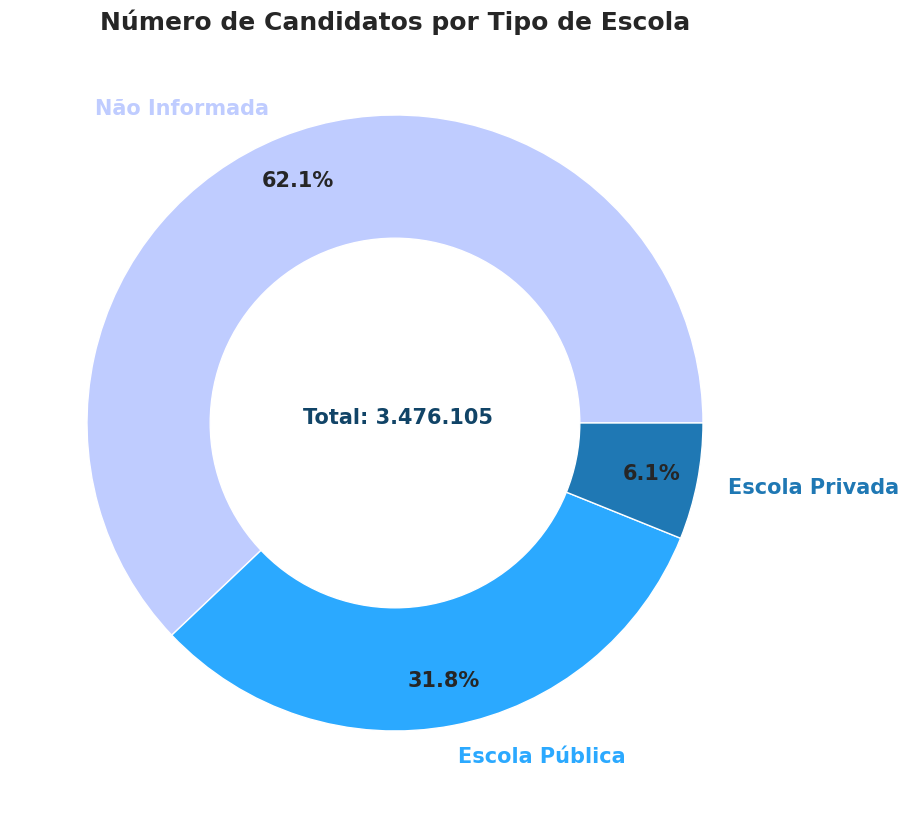

In [ ]:
# Plotagem
fig, ax = plt.subplots(figsize=(16, 10))

# Gráfico das categorias
grafico1 = ax.pie(presencaInscritos['NU_INSCRICAO'],
                  radius=1,
                  labels=presencaInscritos['TP_ESCOLA'],
                  wedgeprops=dict(edgecolor='white'),
                  colors=coresPrincipais,
                  autopct='%1.1f%%',
                  pctdistance=0.85,
                  textprops={'fontweight': 'bold', 'fontsize': 15})

# Colorir Labels do gráfico
for label, color in zip(grafico1[1],coresPrincipais):
    label.set_color(color)

# Limpar o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)

# Rótulos e anotações
totalInscritos = presencaInscritos['NU_INSCRICAO'].sum()
totalInscritos_formatted = '{:,.0f}'.format(totalInscritos).replace(',', '.')

plt.annotate(text='Total: {}'.format(totalInscritos_formatted), xy=(-0.3, 0), fontsize=15, color='#114467', fontweight='bold')
plt.title('Número de Candidatos por Tipo de Escola', fontsize=18, fontweight='bold')
plt.show()

## **Gráfico 2: Número de Candidatos Presentes e Eliminados por Tipo de Escola**

> Bloco com recuo

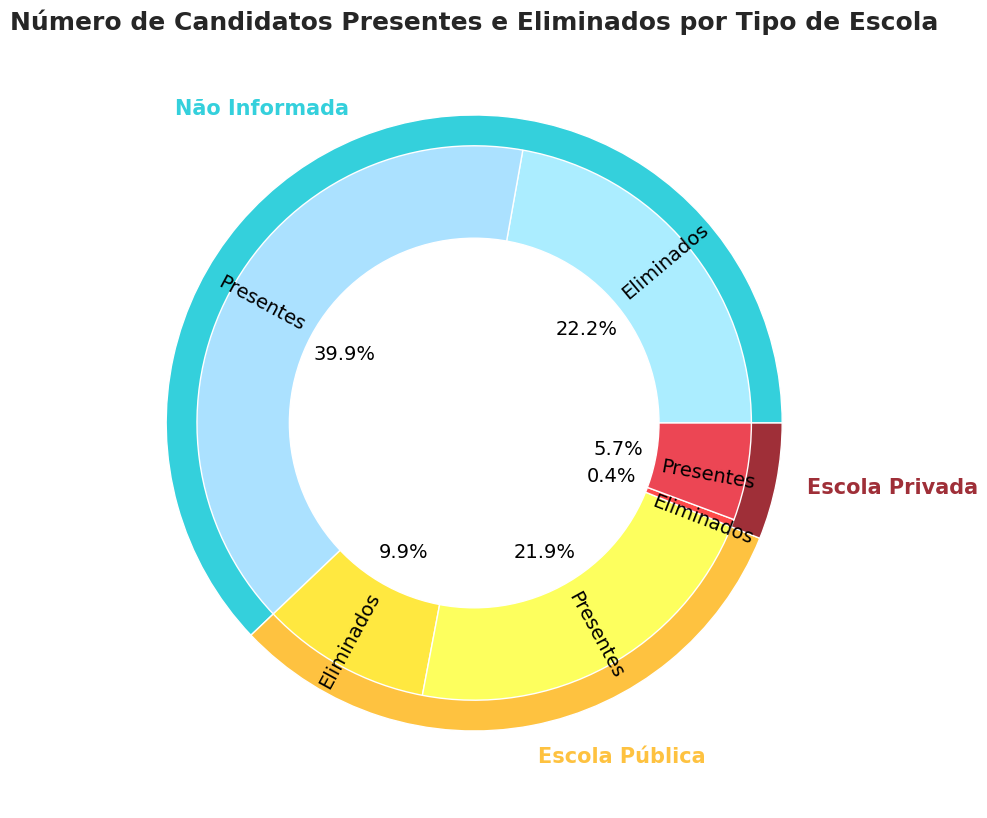

In [ ]:
#Plotagem
fig, ax = plt.subplots(figsize=(16, 10))

 # Gráfico das categorias
grafico2 = ax.pie(presencaInscritos['NU_INSCRICAO'],
                   radius=1,
                   labels=presencaInscritos['TP_ESCOLA'],
                   wedgeprops=dict(edgecolor='white'),
                   colors=coresSecundarias,
                  textprops={'fontweight': 'bold', 'fontsize': 15})

 # Colorir Labels do gráfico
for label, color in zip(grafico2[1], coresSecundarias):
     label.set_color(color)

# Gráfico das subcategorias
grafico3 = ax.pie(presencaEscola['NU_INSCRICAO'],
                   radius=0.9,
                   labels=presencaEscola['ELIMINADOS_CONC'],
                   colors=coresTerciarias,
                   labeldistance=0.68,
                   wedgeprops=dict(edgecolor='white'),
                   pctdistance=0.53,
                   rotatelabels=True,
                   autopct=lambda pct: "{:.1f}%".format(pct),
                   textprops={'color': 'black', 'fontsize': 14})

# Limpar o centro do círculo
centre_circle = plt.Circle((0, 0), 0.6, fc='white')
fig.gca().add_artist(centre_circle)

# Rótulos e anotações
plt.title('Número de Candidatos Presentes e Eliminados por Tipo de Escola', fontsize=18, fontweight='bold')
plt.show()

## **Gráfico 3: Número de Candidatos Presentes por Cor/Raça Declarada**


> Bloco com recuo



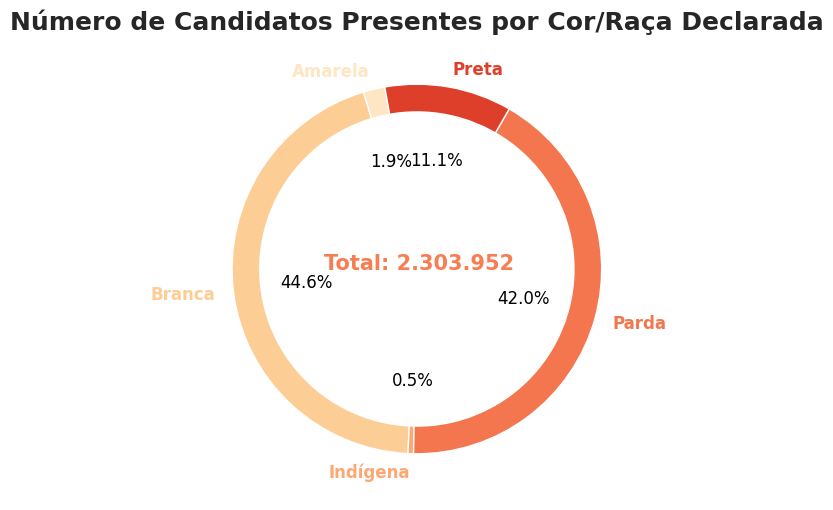

In [ ]:
# Ordenando mediaRaca
mediaRacaSorted = mediaRaca.sort_values('Cor/Raça')

# Plotagem
plt.figure(figsize=(12, 6))

# Gráfico das categorias
wedges, texts, autotexts = plt.pie(mediaRacaSorted['Quantidade'], labels=mediaRacaSorted['Cor/Raça'], autopct='%1.1f%%', startangle=100,colors=cores2)

# Configurar as propriedades dos textos
plt.setp(autotexts, size=12, color='black')

for label, wedge in zip(texts, wedges):
     label.set_color(wedge.get_facecolor())
     label.set_fontweight('bold')
     label.set_fontsize(12)


# Limpar o círculo central
centre_circle = plt.Circle((0, 0), 0.85, fc='white')
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

# Calcular e exibir a quantidade total
totalInscritosRaca = mediaRaca['Quantidade'].sum()
totalInscritosRaca_formatted = '{:,.0f}'.format(totalInscritosRaca).replace(',', '.')

# Rótulos e anotações
plt.annotate(text='Total: {}'.format(totalInscritosRaca_formatted), xy=(-0.5, 0), color='#f77e52', fontsize=15, fontweight='bold')
plt.title('Número de Candidatos Presentes por Cor/Raça Declarada', fontsize=18, fontweight='bold')
plt.show()

## **Gráfico 4: Nota Média por Cor/Raça Declarada**


> Bloco com recuo



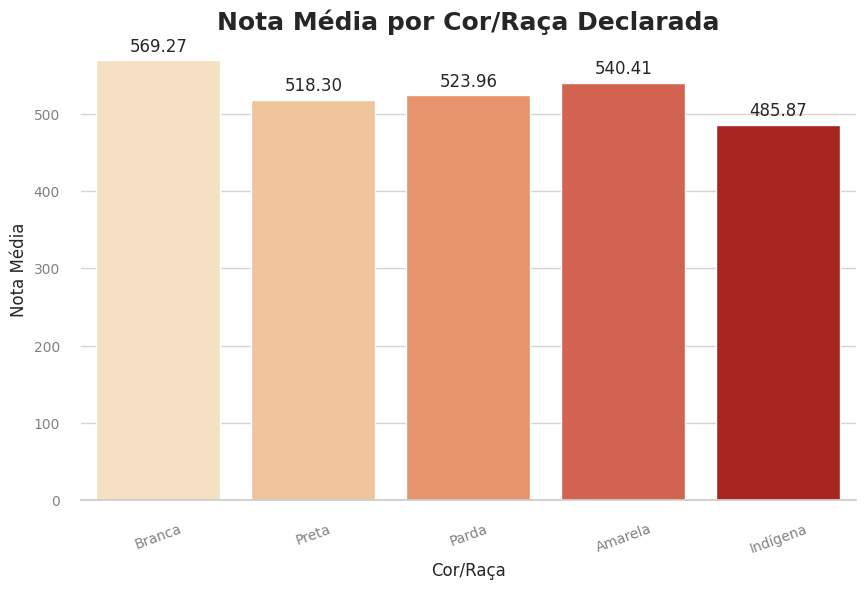

In [ ]:
# Plotagem
plt.figure(figsize=(10, 6))

# Gráfico das categorias
ax = sns.barplot(x='Cor/Raça', y='Nota Média', data=mediaRaca, palette='OrRd')
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center', va = 'center', xytext = (0, 10), textcoords = 'offset points')

# Ajustar a estética do gráfico
sns.set(style='whitegrid')
plt.xlabel('Cor/Raça', fontsize = 12)
plt.ylabel('Nota Média', fontsize = 12)
plt.xticks(rotation = 20, color='grey', fontsize = 10)
plt.yticks(color='grey', fontsize = 10)

# Mostrar os grids
ax.yaxis.grid(True, color='lightgrey')
ax.set_axisbelow(True)

# Borda top e right invisiveis
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rótulos e anotações
plt.title('Nota Média por Cor/Raça Declarada', fontsize=18, fontweight='bold')
plt.show()

## **Gráfico 5: Nota Média das Matérias por Tipo de Escola**


> Bloco com recuo



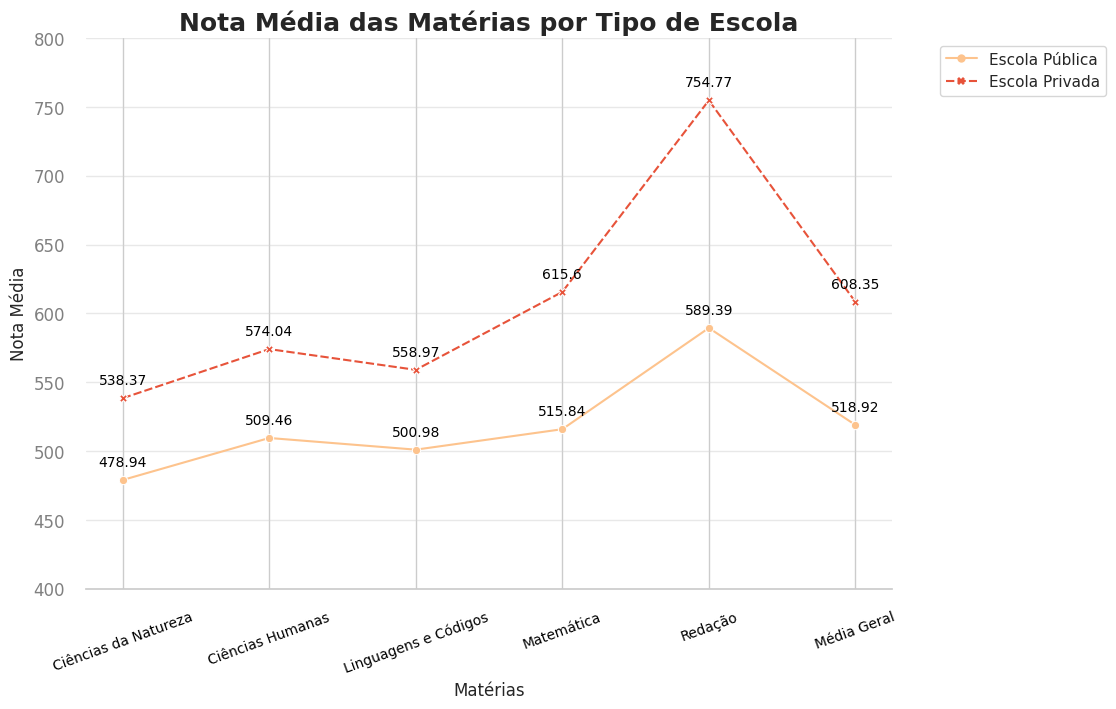

In [ ]:
# Transformar as colunas em linhas utilizando o melt
mediaTipoEscolaMelted = mediaTipoEscola.melt(id_vars='TP_ESCOLA', var_name='Nota', value_name='Valor')

# Plotagem
g = sns.lineplot(
    data=mediaTipoEscolaMelted, x='Nota', y='Valor', hue='TP_ESCOLA',
    palette='OrRd', markers=True, style='TP_ESCOLA'
)

for _, row in mediaTipoEscolaMelted.iterrows():
    g.annotate(round(row['Valor'], 2), (row['Nota'], row['Valor']),
               textcoords="offset points",fontsize=10, color = 'black', xytext=(0,10), ha='center')

plt.xticks(rotation=20, fontsize = 10, color = 'black')
plt.yticks(fontsize = 12, color = 'grey')
plt.ylabel('Nota Média')
plt.xlabel('Matérias')

# Borda top, left e right invisiveis
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['left'].set_visible(False)

# Grid
g.yaxis.grid(color='lightgrey', alpha=0.5)
g.set_axisbelow(True)
plt.ylim(400, 800)
plt.title('Nota Média das Matérias por Tipo de Escola', fontsize=18, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

## **Gráfico 6: Quantidade de Redações Zeradas por Tipo de Escola**


> Bloco com recuo


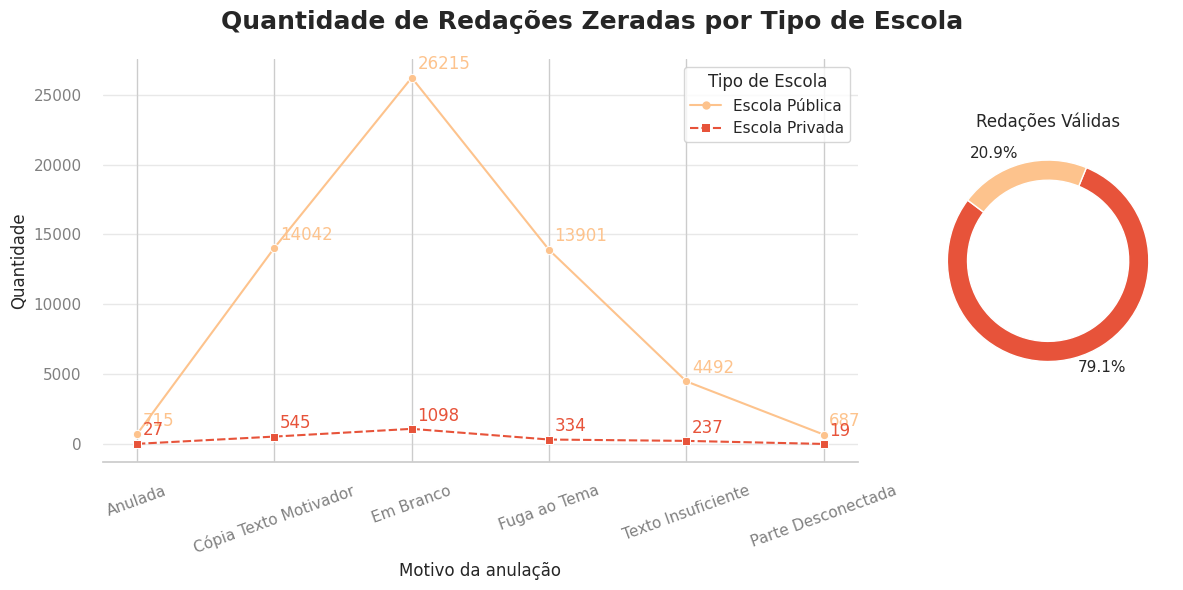

In [ ]:
# Plotagem
fig = plt.figure(figsize=(12, 6))
gs = gridspec.GridSpec(1, 2, width_ratios=[3, 1])

# Primeiro subplot: Gráfico de Linhas
ax1 = plt.subplot(gs[0])
sns.lineplot(data=statusRedacaoAnuladas,
             x='TP_STATUS_REDACAO', y='Quantidade', hue='TP_ESCOLA', style='TP_ESCOLA',
               markers=['o', 's'], ax=ax1, palette ='OrRd')
ax1.set_xlabel('Motivo da anulação')
ax1.set_ylabel('Quantidade')
ax1.legend(title='Tipo de Escola')

# Borda top, left e right invisiveis
ax1.spines['left'].set_visible(False)
ax1.spines['right'].set_visible(False)
ax1.spines['top'].set_visible(False)

# TICSKs
ax1.tick_params(axis='y', colors='grey')
ax1.tick_params(axis='x', colors='grey', rotation = 20)

# Grid
ax1.yaxis.grid(True, color = 'lightgrey', alpha=0.5)

# Valores nos vértices
for line in ax1.lines:
    x_values = line.get_xdata()
    y_values = line.get_ydata()
    line_color = line.get_color()
    for x, y in zip(x_values, y_values):
        ax1.annotate(str(y), xy=(x, y), xytext=(4, 6), textcoords='offset points', color=line_color)

# Segundo subplot: Gráfico de Pizza
ax2 = plt.subplot(gs[1])
wedges, texts = ax2.pie(statusRedacaoValidas['Quantidade'], startangle=143, colors=novas_cores, wedgeprops=dict(width=0.2))
ax2.set_title('Redações Válidas')

# Exibir as quantidades como números nas fatias
total = sum(statusRedacaoValidas['Quantidade'])
percentages = statusRedacaoValidas['Quantidade'] / total * 100

for wedge, text, percentage in zip(wedges, texts, percentages):
    wedge.set_edgecolor('white')  # Adiciona borda branca nas fatias
    text.set_text(f'{percentage:.1f}%')  # Exibe a porcentagem como texto

# Rótulos e anotações
fig.suptitle('Quantidade de Redações Zeradas por Tipo de Escola', fontsize=18, fontweight = 'bold')

# Ajustar o layout
plt.tight_layout()
plt.show()

## **Gráfico 7: Nota Média das Competências das Redações por Tipo de Escola**

> Bloco com recuo


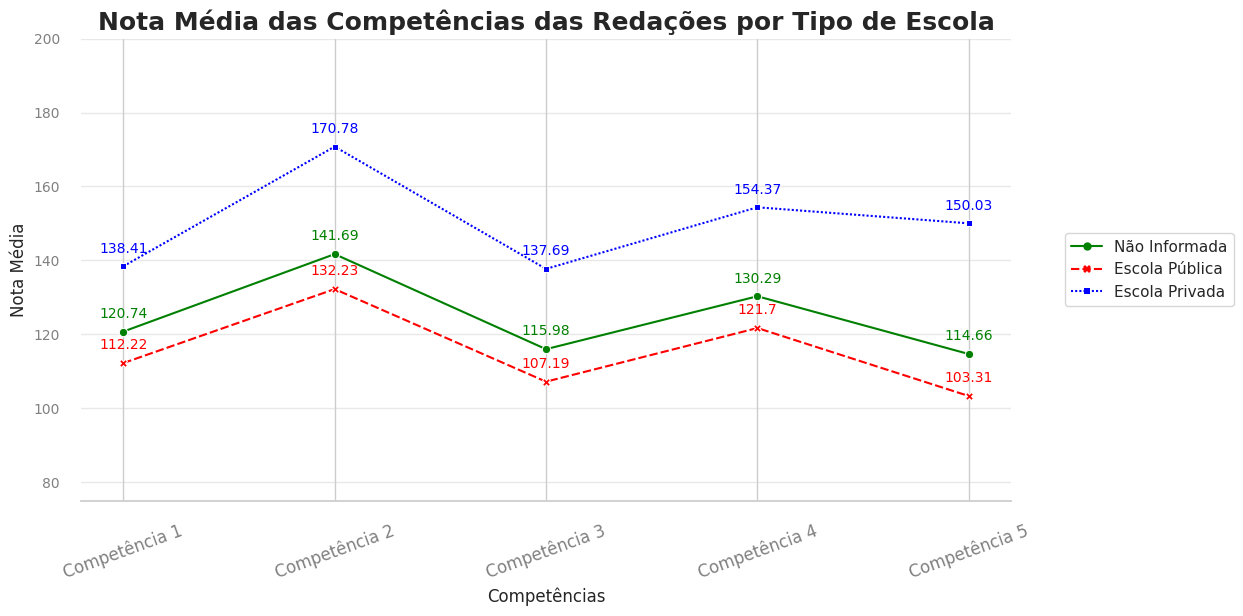

In [ ]:
# Transformar as colunas em linhas utilizando o melt
notaTipoEscolaMelted = notaTipoEscola.melt(id_vars='TP_ESCOLA', var_name='Competência', value_name='Nota')

# Mapear os valores da coluna TP_ESCOLA de acordo com o dicionário tiposEscola
notaTipoEscolaMelted['TP_ESCOLA'] = notaTipoEscolaMelted['TP_ESCOLA'].map(tiposEscola)

# Plotagem
plt.figure(figsize=(12, 6))
g = sns.lineplot(
    data=notaTipoEscolaMelted, x='Competência', y='Nota', hue='TP_ESCOLA',
    palette=colors, markers=True, style='TP_ESCOLA'
)

for _, row in notaTipoEscolaMelted.iterrows():
    color = colors[list(tiposEscola.values()).index(row['TP_ESCOLA'])]
    g.annotate(
        round(row['Nota'], 2), (row['Competência'], row['Nota']),
        textcoords="offset points", fontsize=10, xytext=(0, 10), ha='center',
        color=color)

# TICSKs
plt.xticks(rotation=20, fontsize=12, color='grey')
plt.yticks(fontsize=10, color='grey')
plt.ylabel('Nota Média')
plt.xlabel('Competências')

# Borda top, left e right invisiveis
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['left'].set_visible(False)

# Grid
g.yaxis.grid(color='lightgrey', alpha=0.5)
g.set_axisbelow(True)
plt.ylim(75, 200)

# Rótulos e anotações
plt.title('Nota Média das Competências das Redações por Tipo de Escola', fontsize=18, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

## **Gráfico 8: Nota Média por Cor/Raça e Renda**

> Bloco com recuo



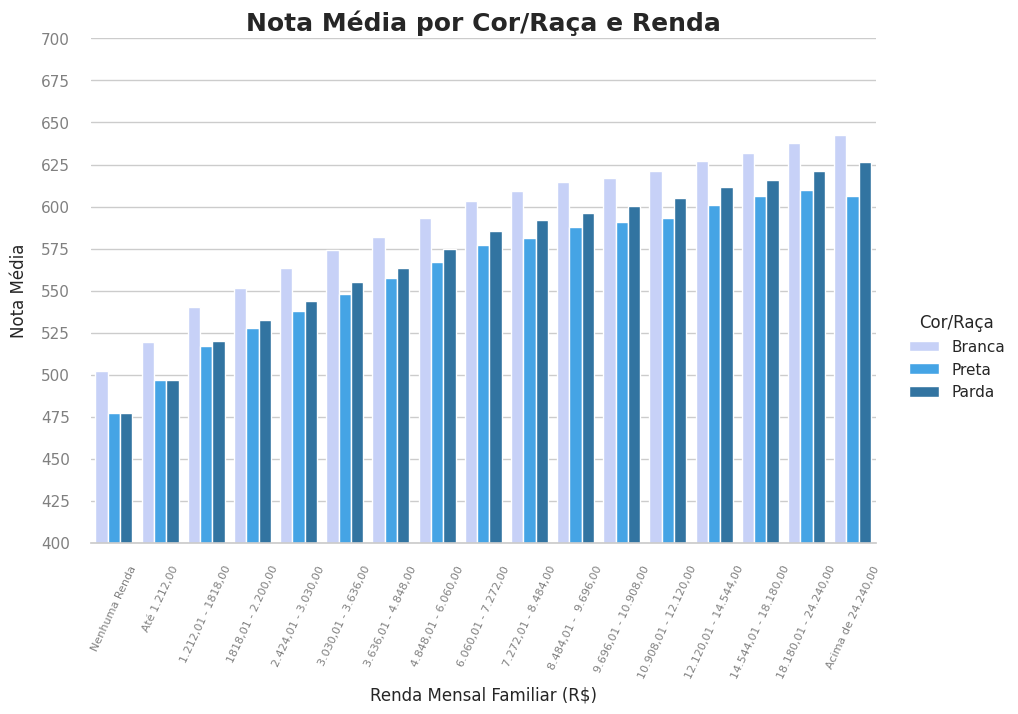

In [ ]:
# Plotagem
g = sns.catplot(
    data=rendaRacaNotas, kind="bar",
    x="Q006", y="Nota Média", hue="TP_COR_RACA",
    errorbar="sd", palette=coresPrincipais, height=6,aspect=1.5
)
ax = g.facet_axis(0, 0)

g.despine(left=True)
g.set_axis_labels("Renda Mensal Familiar (R$)", "Nota Média")
plt.xticks(rotation=65, color='grey')
plt.yticks(color = 'grey')
plt.ylim(400, 700)
ax.xaxis.set_tick_params(labelsize=9)
plt.yticks(range(400, 701, 25), color='grey')

# Adicionar linhas de grade com intervalos de 25 em 25
for y in range(400, 701, 25):
    plt.axhline(y, color='lightgrey', linewidth=0.5, zorder = 0)

ax.xaxis.set_tick_params(labelsize=8)
g.legend.set_title("Cor/Raça")
ax.yaxis.set_label_coords(-0.08, 0.5)

# Rótulos e anotações
g.legend.set_title("Cor/Raça")
plt.title("Nota Média por Cor/Raça e Renda", fontsize=18, fontweight='bold')
plt.show()

## **Gráfico 9: Nota Média por Acesso à Internet**


> Bloco com recuo



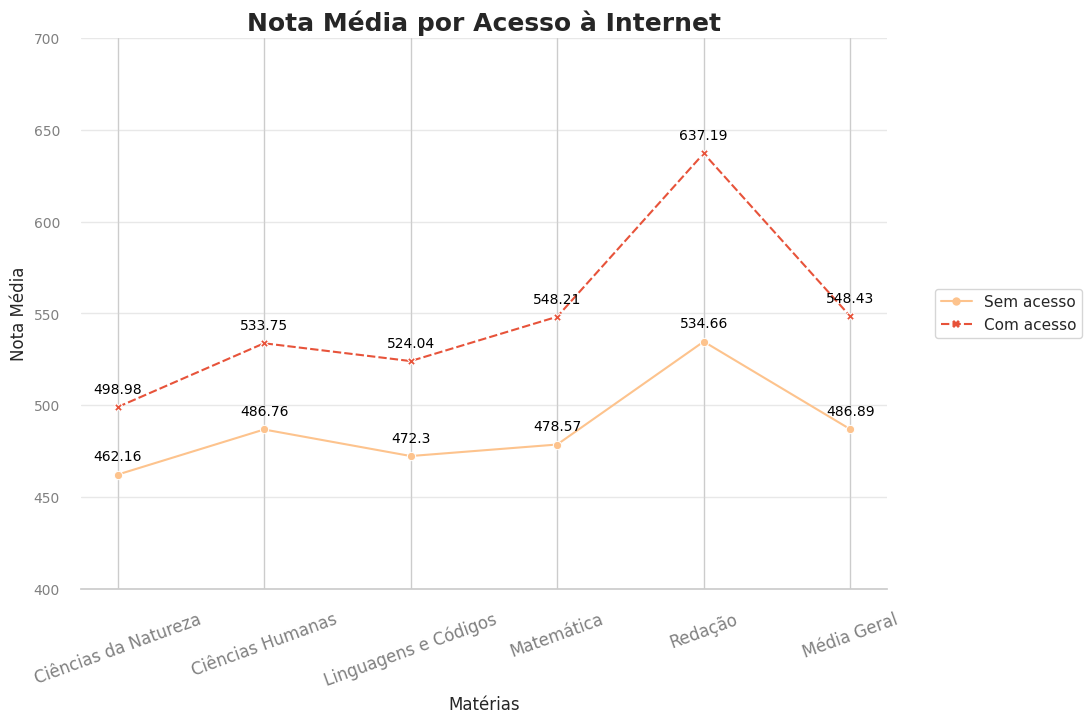

In [ ]:
# Transformar as colunas em linhas utilizando o melt
notaAcessoInternetMelted = notaAcessoInternet.melt(id_vars='Q025', var_name='Nota', value_name='Valor')

# Plotagem
g = sns.lineplot(
    data=notaAcessoInternetMelted, x='Nota', y='Valor', hue='Q025',
    palette='OrRd', markers=True, style='Q025'
)
for _, row in notaAcessoInternetMelted.iterrows():
    g.annotate(round(row['Valor'], 2), (row['Nota'], row['Valor']),
               textcoords="offset points",fontsize=10, color='black', xytext=(0,10), ha='center')

# TICSKs
plt.xticks(rotation=20, fontsize = 12, color = 'grey')
plt.yticks(fontsize = 10, color = 'grey')
plt.ylabel('Nota Média')
plt.xlabel('Matérias')

# Borda top e right invisiveis
g.spines['top'].set_visible(False)
g.spines['right'].set_visible(False)
g.spines['left'].set_visible(False)

# Grid
g.yaxis.grid(color='lightgrey', alpha=0.5)
g.set_axisbelow(True)
plt.ylim(400, 700)

# Rótulos e anotações
plt.title('Nota Média por Acesso à Internet',fontsize=18, fontweight='bold')
plt.legend(bbox_to_anchor=(1.05, 0.5), loc='center left')
plt.show()

## **Gráfico 10: Nota Média por Nível de Escolaridade dos Responsáveis**

> Bloco com recuo



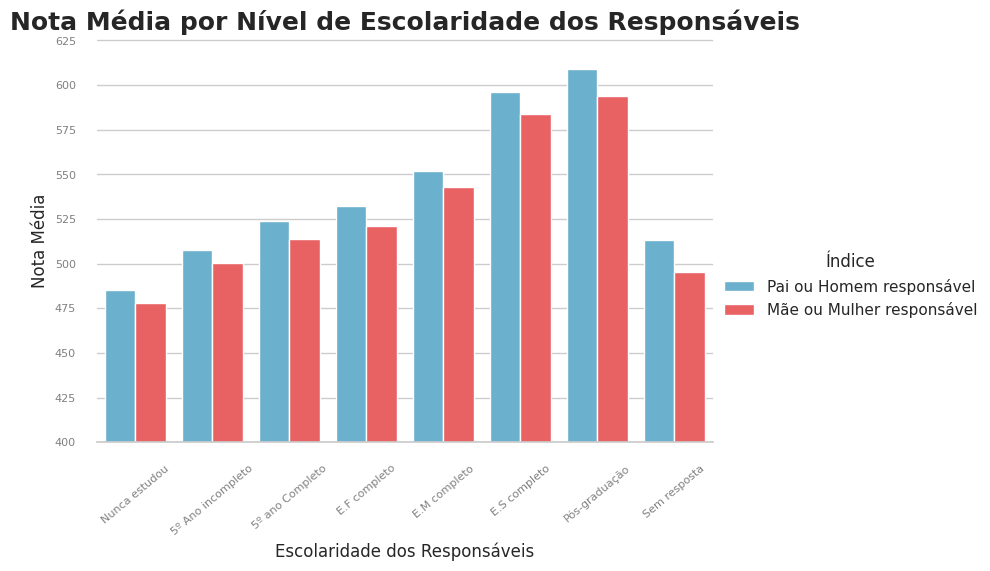

In [ ]:
# Fazendo merge do nível de escolaridade dos pais ou responsáveis
df_merged = pd.merge(escolaridadePaiNota, escolaridadeMaeNota, on='Nível de Escolaridade', suffixes=('Q001', 'Q002'))

# Transformar as colunas em linhas utilizando o melt
df_melted = df_merged.melt(id_vars='Nível de Escolaridade', var_name='Variável', value_name='Média da Nota')

df_melted['Variável'] = df_melted['Variável'].str.replace('meanQ001', 'Pai ou Homem responsável')
df_melted['Variável'] = df_melted['Variável'].str.replace('meanQ002', 'Mãe ou Mulher responsável')

# Plotagem
g4 = sns.catplot(data=df_melted, x='Nível de Escolaridade',
                 y='Média da Nota', palette=['#5bb8dd','#ff4b4e'],
                 hue='Variável',aspect=1.5, kind='bar')

# TICSKs
ax = g4.facet_axis(0, 0)
g4.despine(left=True)
plt.xticks(rotation=40, color='grey')
plt.yticks(color = 'grey')
plt.ylim(400, 626)
ax.xaxis.set_tick_params(labelsize=8)
plt.yticks(range(400, 626, 25), color='grey', fontsize = 8)

# Adicionar linhas de grade com intervalos de 25 em 25
for y in range(400, 626, 25):
    plt.axhline(y, color='lightgrey', linewidth=0.5, zorder = 0)

# Rótulos e anotações
g4.legend.set_title("Índice")
g4.set_axis_labels("Escolaridade dos Responsáveis", "Nota Média")
plt.title("Nota Média por Nível de Escolaridade dos Responsáveis", fontsize=18, fontweight='bold')
plt.show()

## **Gráfico 11: Nota Média por UF**

> Bloco com recuo



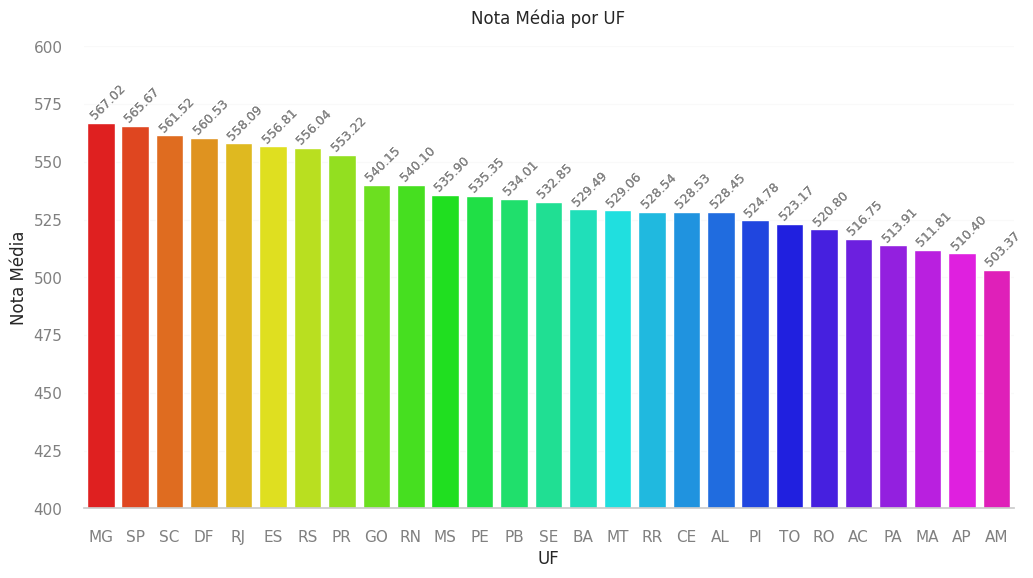

In [ ]:
# Plotagem
plt.figure(figsize=(12, 6))
sns.barplot(x='Sigla UF', y='Média', data=mediaTipoEscolaUF)
sns.set_palette(cores2)

# Adicionar os valores das barras no gráfico
ax = sns.barplot(x='Sigla UF', y='Média', data=mediaTipoEscolaUF, palette = degrade)
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.2f'), (p.get_x() + p.get_width() / 2., p.get_height()),\
                 ha = 'center', va = 'center', xytext = (5, 15), textcoords = 'offset points', rotation=45,\
                    fontsize =9, color='grey')

# Ajustar a estética do gráfico
sns.set(style='whitegrid')
plt.ylim(400, 600)
plt.xticks(color='grey')
plt.yticks(color='grey')


# Grid
ax.yaxis.grid(True, alpha=0.1)
ax.set_axisbelow(True)

# Borda top e right invisiveis
ax.spines['top'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.spines['right'].set_visible(False)

# Rótulos e anotações
plt.title('Nota Média por UF', y=1.03)
plt.xlabel('UF')
plt.ylabel('Nota Média')
plt.show()